In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_text

from statistics import stdev


data=pd.read_csv('./depression.csv')

In [44]:
OUTCOME='D'

def attr_probs(data,attr):
    probs={}
    values=np.unique(data[attr])
    for i in values:
        rows=data.loc[data[attr] == i]
        negative=np.count_nonzero(rows['D']==0)
        positive=np.count_nonzero(rows['D']==1)

        probs[i]=positive/(positive+negative)

    return probs



In [45]:
print(attr_probs(data,'A'))

{0: 0.6711111111111111, 1: 0.4052631578947368}


In [46]:
def entropy(probs):
    entropy=0
    for i,value in enumerate(probs):
        if value!=0:
            entropy-=value*np.log2(value)
    return entropy

In [47]:
print(entropy([2/8, 0/8, 4/8, 2/8]))

1.5


In [48]:
def gain(data,attr):
    total=data.shape[0]
    sum=0

    for key,value in attr_probs(data,attr).items():
        nRows=len(data.loc[data[attr]==key])
        portion=nRows/total
        entropyS=entropy([value,1-value])
        sum+=entropyS*portion

    portion=np.count_nonzero(data['D']==1)/total
    gain=entropy([portion,1-portion])-sum
    return gain
        


In [49]:
TTRS = ['A', 'B', 'C']
for attr in TTRS:
    print('Gain {attr}: {gain:.2f}'.format(attr=attr, gain=gain(data, attr)))

Gain A: 0.05
Gain B: 0.02
Gain C: 0.07


In [50]:
labels=data.iloc[:,-1]
samples=data.iloc[:,:-1]

x_train,x_test,y_train,y_test=train_test_split(samples,labels,test_size=0.3,random_state=7)

tree=DecisionTreeClassifier(criterion="entropy")
tree.fit(x_train,y_train)

y_pred = tree.predict(x_test)
print(classification_report(y_test,y_pred))

print(export_text(decision_tree=tree,feature_names=['A','B','C']))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       154
           1       0.66      0.76      0.71       152

    accuracy                           0.69       306
   macro avg       0.69      0.69      0.68       306
weighted avg       0.69      0.69      0.68       306

|--- C <= 1.50
|   |--- A <= 0.50
|   |   |--- B <= 0.50
|   |   |   |--- C <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- C >  0.50
|   |   |   |   |--- class: 1
|   |   |--- B >  0.50
|   |   |   |--- C <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- C >  0.50
|   |   |   |   |--- class: 1
|   |--- A >  0.50
|   |   |--- C <= 0.50
|   |   |   |--- B <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- B >  0.50
|   |   |   |   |--- class: 0
|   |   |--- C >  0.50
|   |   |   |--- B <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- B >  0.50
|   |   |   |   |--- class: 1
|--- C >  1.50
|   |--- B <= 0.50
|   |   |--- A <= 0.50
|   |   |   |--

Example:
case: cx = (A=1, B=1, C=1)
path: (C <= 1.5) --> (A > 0.5) --> (C > 0.5) --> (B > 0.5) --> class 1

Answer:
case: c1 = (A=1, B=0, C=2)
path: (C >  1.50) --> (B <= 0.50) --> (A >  0.50) --> class 0
_
case: c2 = (A=0, B=0, C=0)
path: (C <= 1.50) --> (A <= 0.50) --> (B <= 0.50) --> (C <= 0.50) --> class 1
_
case: c3 = (A=0, B=0, C=1)
path: (C <= 1.50) --> (A <= 0.50) --> (B <= 0.50) --> (C >  0.50) --> class 1
_
case: c4 = (A=1, B=1, C=0)
path: (C <= 1.50) --> (A > 0.50) --> (C <= 0.50) --> (B >  0.50) --> class 0

In [51]:
#Exercicio 7
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_pred).ravel()

values = [true_negative, false_positive, false_negative, true_positive]
labels = ['true_negative', 'false_positive', 'false_negative', 'true_positive']
for i, value in enumerate(values):
    print('{attr}: {value}'.format(attr=labels[i], value= value))

print()

#accuracy, precision, recall and f1-score .

values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
labels = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score']

for i, value in enumerate(values):
    print('{attr}: {value:.2f}'.format(attr=labels[i], value= value))


true_negative: 95
false_positive: 59
false_negative: 37
true_positive: 115

accuracy_score: 0.69
precision_score: 0.66
recall_score: 0.76
f1_score: 0.71


Repeat the process of spliting the data, training the classifier and testing the classifier 100 times (use the values from 0 to 99 as random_state for the
train_test_split function). Plot the accuracy across the 100 repetitions, reporting also its mean value and standard deviation.

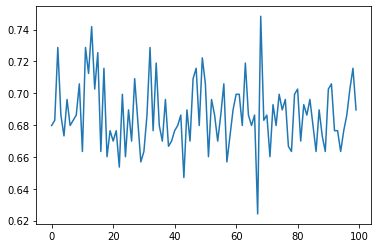

Average: 0.69
Standard Deviation: 0.02


In [55]:
#Exercicio 8
def plot_accuracy():
    accuracy = np.array([])

    for i in range(0,100):
        labels=data.iloc[:,-1]
        samples=data.iloc[:,:-1]

        x_train,x_test,y_train,y_test=train_test_split(samples,labels,test_size=0.3)
        y_pred = tree.predict(x_test)

        accuracy = np.append(accuracy, accuracy_score(y_test, y_pred))
    return accuracy
    
accuracy = plot_accuracy()
plt.plot(np.arange(100), accuracy)
plt.show()

print("Average: {value:.2f}".format(value= sum(accuracy)/100))
print("Standard Deviation: {value:.2f}".format(value= stdev(accuracy)))
